In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

## Week 1: Exploratory Data Analysis (EDA)
- Check for missing, duplicate, or invalid values
- Review column data types and formats
- Understand class balance of the target variable
- Visualize distributions, correlations, and feature-to-target patterns
- Document top 3–5 insights in your report

In [27]:
import pandas as pd

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# --- Check for Missing Values ---
print("--- Missing Values ---")
print(df.isnull().sum())

# --- Check for Duplicate Rows ---
print("\n--- Duplicate Rows ---")
print(f"Total number of duplicate rows: {df.duplicated().sum()}")

# --- Check for Invalid Values ---
print("\n--- Invalid Values ---")
invalid_values_found = {}

# Check binary columns for values other than 0 or 1
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
               'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']
for col in binary_cols:
    invalid_count = df[~df[col].isin([0, 1])].shape[0]
    if invalid_count > 0:
        invalid_values_found[col] = invalid_count

# Check integer columns for values outside the specified scale/range
invalid_gen_hlth = df[~df['GenHlth'].isin(range(1, 6))].shape[0]
if invalid_gen_hlth > 0:
    invalid_values_found['GenHlth'] = invalid_gen_hlth

invalid_ment_hlth = df[~df['MentHlth'].isin(range(0, 31))].shape[0]
if invalid_ment_hlth > 0:
    invalid_values_found['MentHlth'] = invalid_ment_hlth

invalid_phys_hlth = df[~df['PhysHlth'].isin(range(0, 31))].shape[0]
if invalid_phys_hlth > 0:
    invalid_values_found['PhysHlth'] = invalid_phys_hlth

invalid_age = df[~df['Age'].isin(range(1, 14))].shape[0]
if invalid_age > 0:
    invalid_values_found['Age'] = invalid_age

invalid_education = df[~df['Education'].isin(range(1, 7))].shape[0]
if invalid_education > 0:
    invalid_values_found['Education'] = invalid_education

invalid_income = df[~df['Income'].isin(range(1, 9))].shape[0]
if invalid_income > 0:
    invalid_values_found['Income'] = invalid_income

if invalid_values_found:
    for col, count in invalid_values_found.items():
        print(f"Column '{col}' has {count} invalid value(s).")
else:
    print("No invalid values found based on the provided descriptions.")

--- Missing Values ---
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

--- Duplicate Rows ---
Total number of duplicate rows: 24206

--- Invalid Values ---
No invalid values found based on the provided descriptions.


The nect code calculates the total number of unique answer combinations and the probability that two random people have the same answers, using all the variables you listed (excluding the target).

In [28]:
# Calculate the total number of unique answer combinations for all variables

# Dictionary of variable names and their number of unique options
variable_options = {
    "HighBP": 2,
    "HighChol": 2,
    "CholCheck": 2,
    "Smoker": 2,
    "Stroke": 2,
    "HeartDiseaseorAttack": 2,
    "PhysActivity": 2,
    "Fruits": 2,
    "Veggies": 2,
    "HvyAlcoholConsump": 2,
    "AnyHealthcare": 2,
    "NoDocbcCost": 2,
    "GenHlth": 5,
    "MentHlth": 31,      # 0-30 inclusive
    "PhysHlth": 31,      # 0-30 inclusive
    "DiffWalk": 2,
    "Sex": 2,
    "Age": 13,
    "Education": 6,
    "Income": 8
}

# Calculate total combinations (excluding Diabetes_binary, which is the target)
from functools import reduce
import operator

total_combinations = reduce(operator.mul, variable_options.values(), 1)
print(f"Total possible unique answer combinations: {total_combinations:,}")

# Probability that two random people have the same answers (assuming independence and uniform distribution)
probability_same_answers = 1 / total_combinations
print(f"Probability that two random people have the same answers: {probability_same_answers:.2e}")

Total possible unique answer combinations: 49,124,474,880
Probability that two random people have the same answers: 2.04e-11


For each variable, the code calculates the probability that two people randomly chosen have the same value for that variable (sum of squared frequencies).
Multiplies these probabilities for all variables to get the overall probability.
This gives a much more realistic estimate, especially if some options are much more common than others.

In [29]:
# List of variables to include (excluding the target)
variables = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex",
    "Age", "Education", "Income"
]

prob_same = 1.0
for var in variables:
    freqs = df[var].value_counts(normalize=True)
    prob_same_var = (freqs ** 2).sum()
    prob_same *= prob_same_var
    print(f"{var}: P(same) = {prob_same_var:.4f}")

print(f"\nEstimated probability that two random people have the same answers: {prob_same:.2e}")

HighBP: P(same) = 0.5101
HighChol: P(same) = 0.5115
CholCheck: P(same) = 0.9281
Smoker: P(same) = 0.5065
Stroke: P(same) = 0.9222
HeartDiseaseorAttack: P(same) = 0.8294
PhysActivity: P(same) = 0.6316
Fruits: P(same) = 0.5360
Veggies: P(same) = 0.6940
HvyAlcoholConsump: P(same) = 0.8939
AnyHealthcare: P(same) = 0.9069
NoDocbcCost: P(same) = 0.8458
GenHlth: P(same) = 0.2619
MentHlth: P(same) = 0.4895
PhysHlth: P(same) = 0.4132
DiffWalk: P(same) = 0.7202
Sex: P(same) = 0.5071
Age: P(same) = 0.0925
Education: P(same) = 0.3178
Income: P(same) = 0.2010

Estimated probability that two random people have the same answers: 1.73e-06


In [30]:
# The ID column is a separate variable, not a feature
# We can access it from cdc_diabetes_health_indicators.data.ids
patient_ids = cdc_diabetes_health_indicators.data.ids

# --- Verify that the ID column exists and check its size ---
print(f"\nNumber of patient IDs: {len(patient_ids)}")
print(f"Number of rows in the features data (X): {len(X)}")


Number of patient IDs: 253680
Number of rows in the features data (X): 253680


In [31]:
# --- Review data types ---
print("--- Data Types ---")
print(df.dtypes)

# --- Review column formats by showing example values ---
print("\n--- Column Format Examples ---")
for col in df.columns:
    # Check if the column is not empty before trying to access values
    if not df[col].empty:
        # For readability, get the first non-missing value
        example_value = df[col].dropna().iloc[0] if not df[col].dropna().empty else "N/A"
        print(f"Column '{col}' is of type '{df[col].dtype}'. Example value: {example_value}")
    else:
        print(f"Column '{col}' is empty.")

--- Data Types ---
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

--- Column Format Examples ---
Column 'HighBP' is of type 'int64'. Example value: 1
Column 'HighChol' is of type 'int64'. Example value: 1
Column 'CholCheck' is of type 'int64'. Example value: 1
Column 'BMI' is of type 'int64'. Example value: 40
Column 'Smoker' is of type 'int64'. Example value: 1
Column 

In [32]:
df.columns  # Display all column names for reference

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [33]:
# --- Understand class balance ---
print("--- Class Balance of 'Diabetes_binary' ---")

# Get the raw counts of each class
class_counts = y['Diabetes_binary'].value_counts()
print("\nRaw Counts:")
print(class_counts)

# Get the normalized percentages of each class
class_percentages = y['Diabetes_binary'].value_counts(normalize=True) * 100
print("\nNormalized Percentages:")
print(class_percentages.round(2))

--- Class Balance of 'Diabetes_binary' ---

Raw Counts:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

Normalized Percentages:
Diabetes_binary
0    86.07
1    13.93
Name: proportion, dtype: float64


In [34]:
# What is the ratio of healthy to diabetic patients?
healthy_count = class_counts.get(0, 0)
diabetic_count = class_counts.get(1, 0)
if diabetic_count > 0:      
    ratio = healthy_count / diabetic_count
    print(f"\nRatio of healthy to diabetic patients: {ratio:.1f}")
else:
    print("\nNo diabetic patients found to calculate the ratio.")


Ratio of healthy to diabetic patients: 6.2


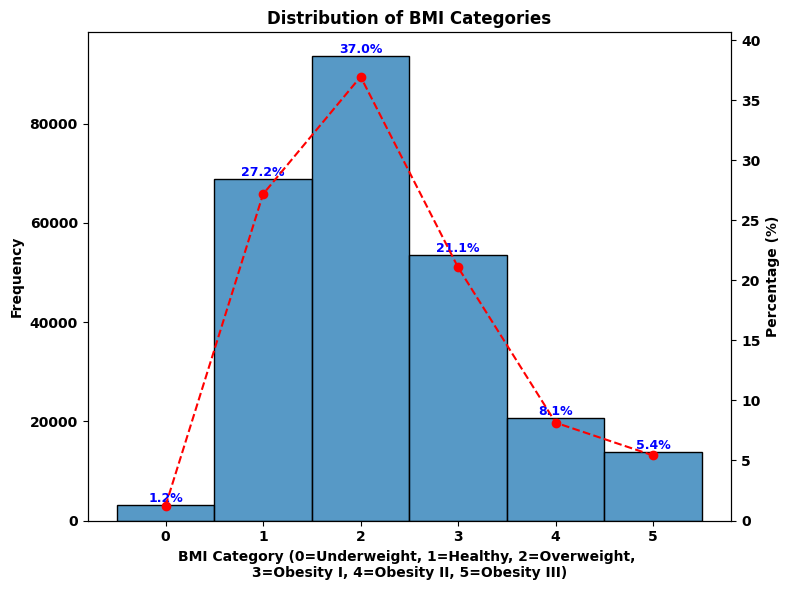

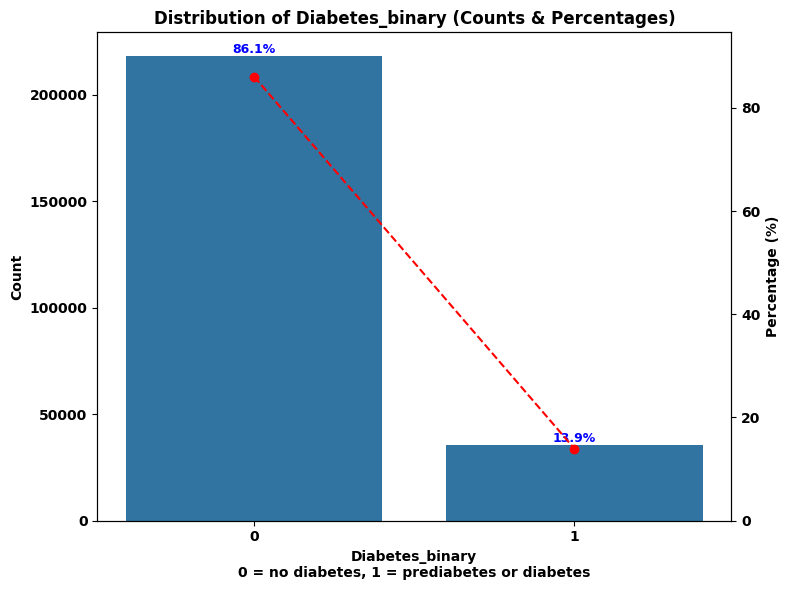

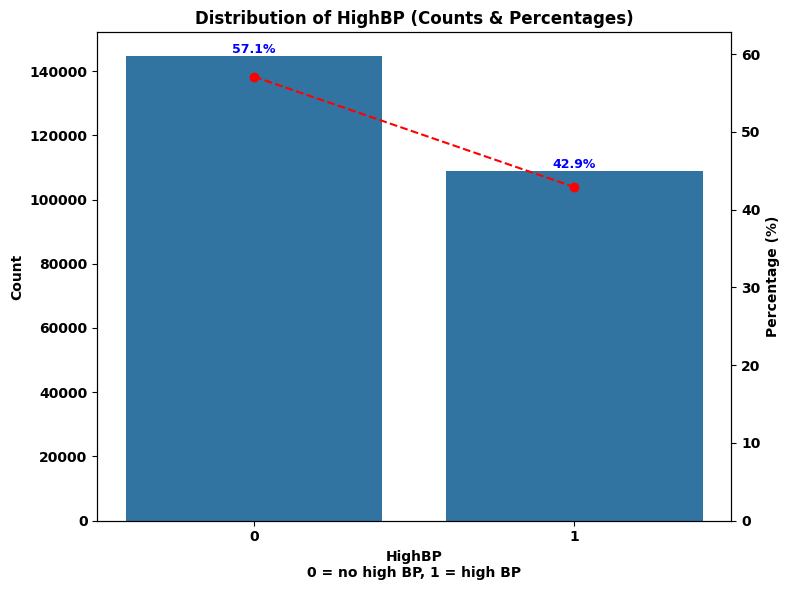

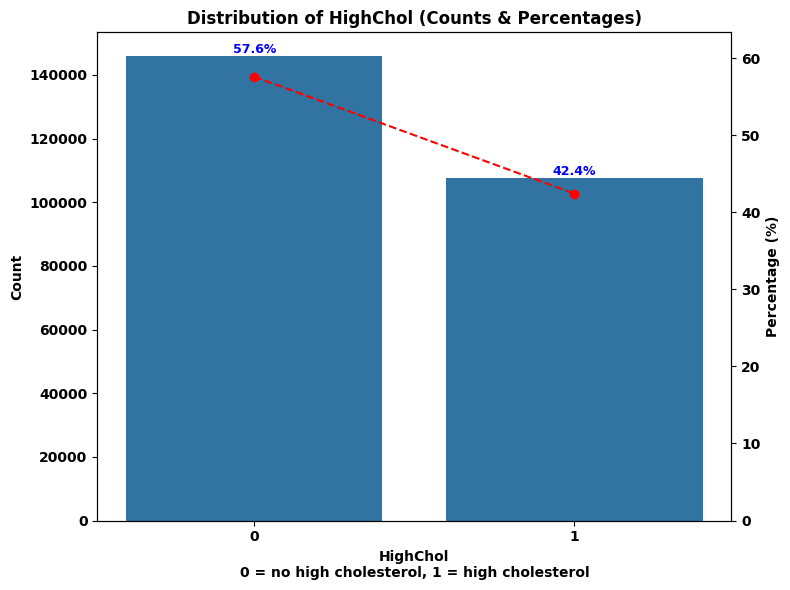

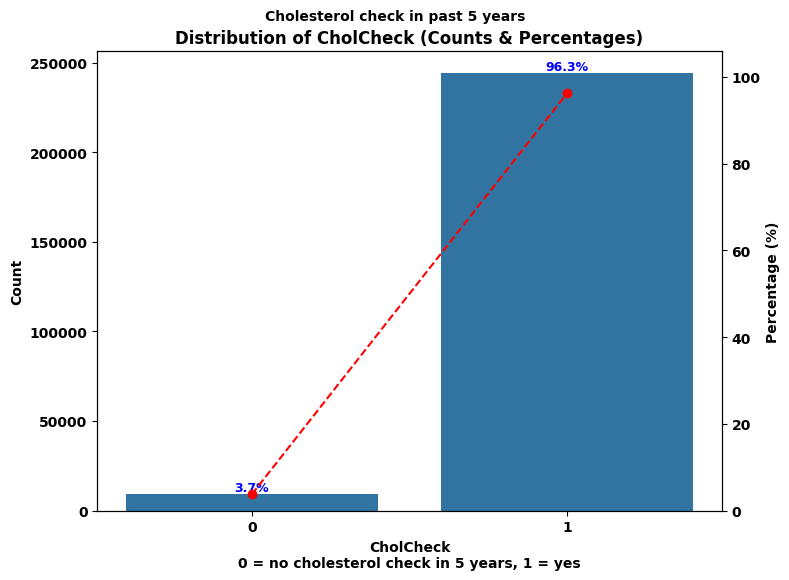

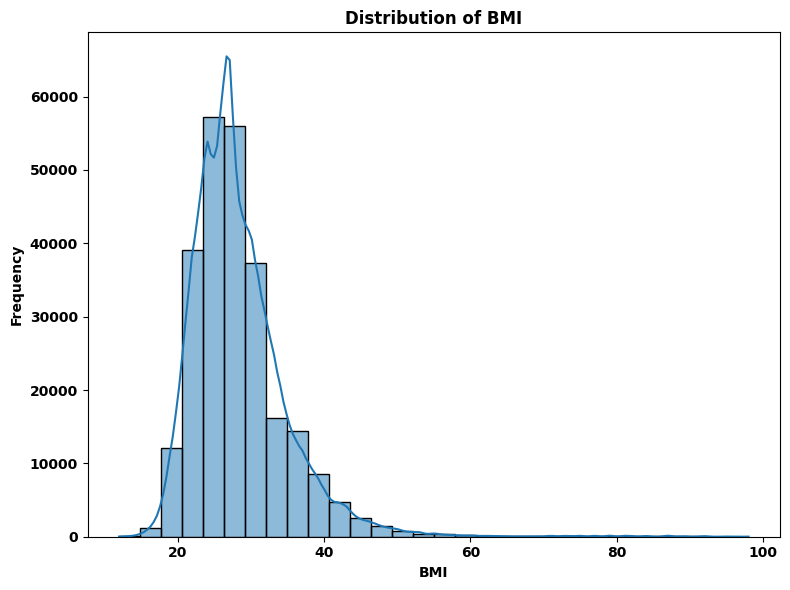

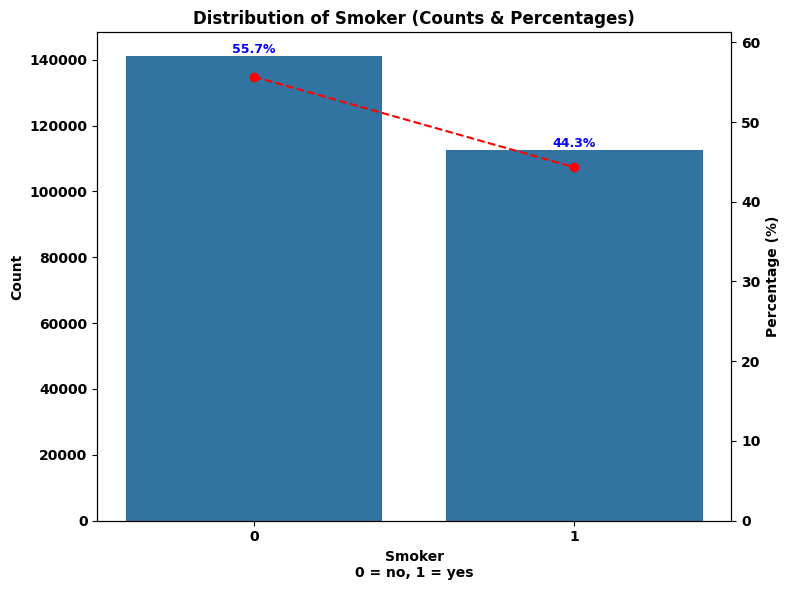

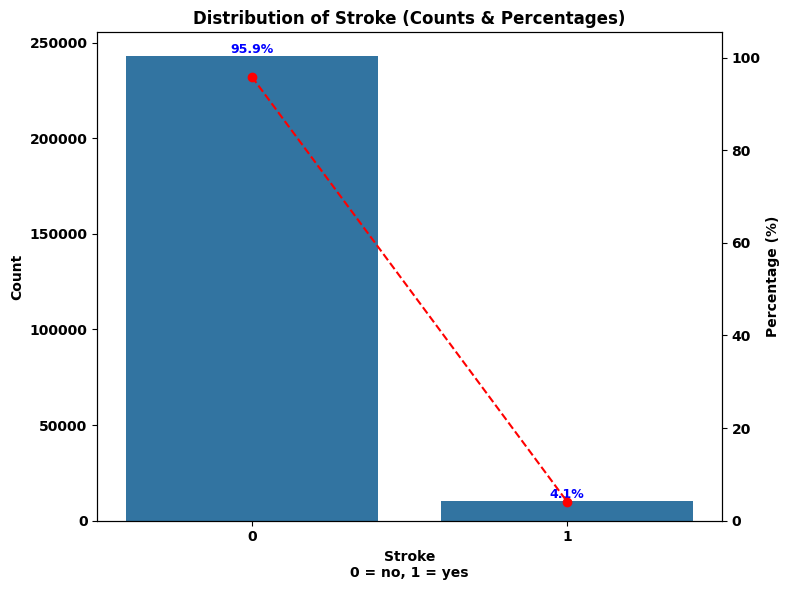

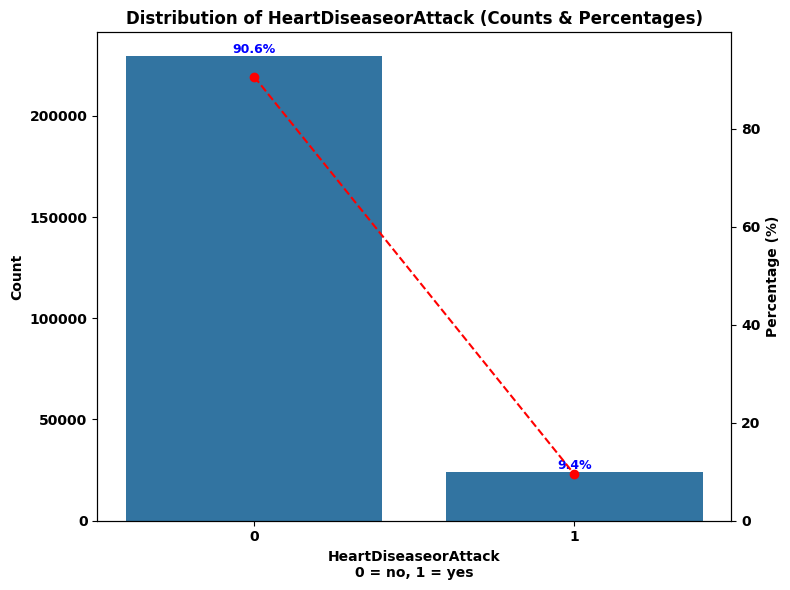

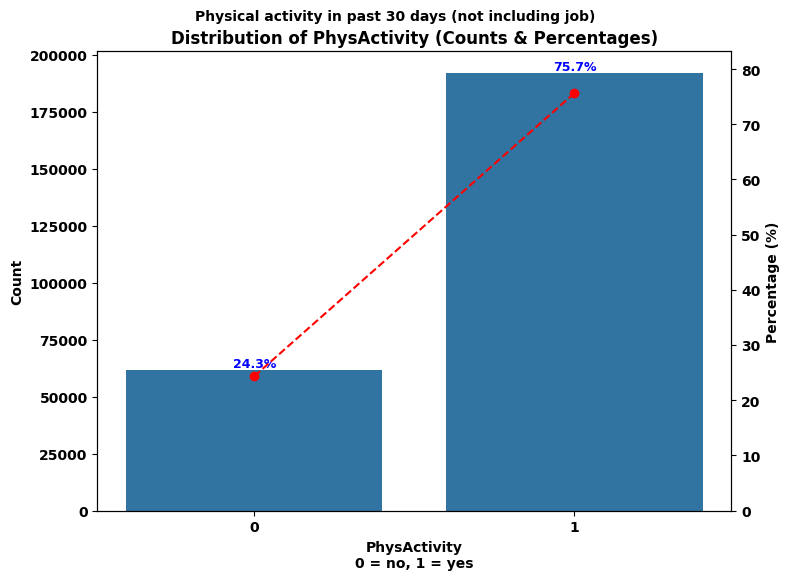

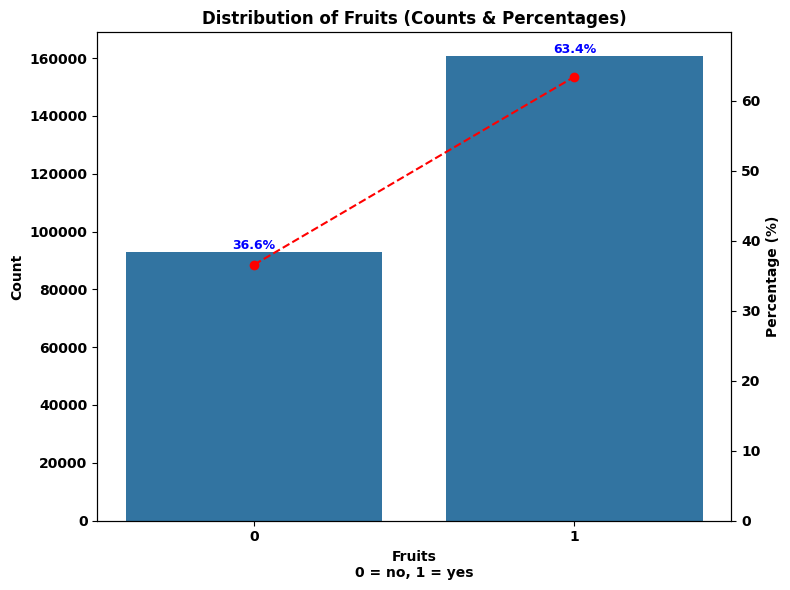

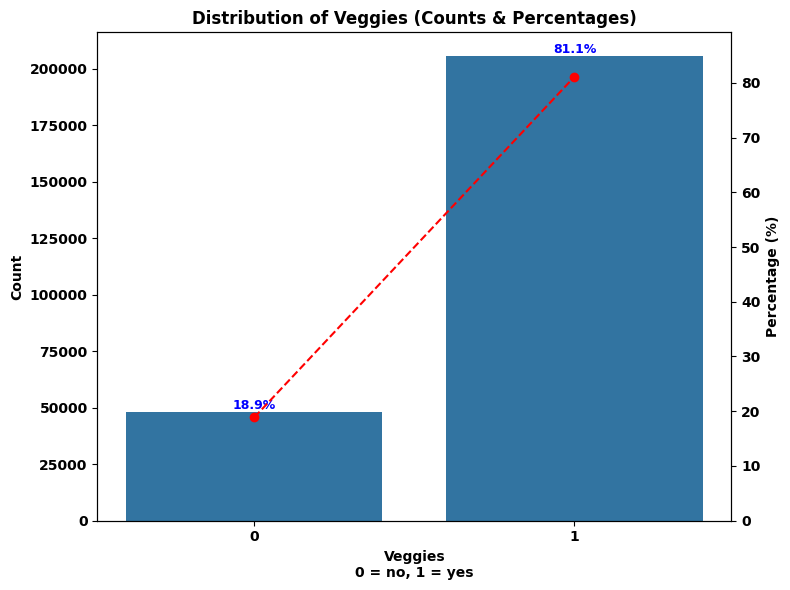

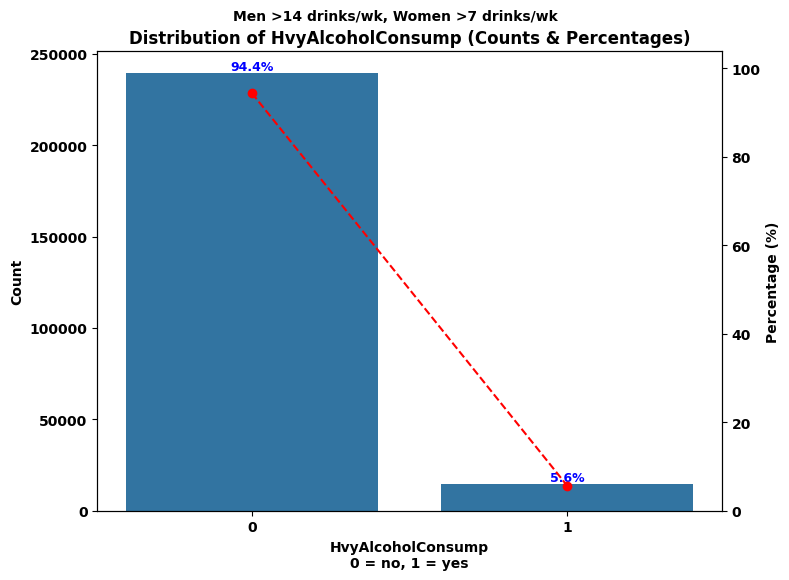

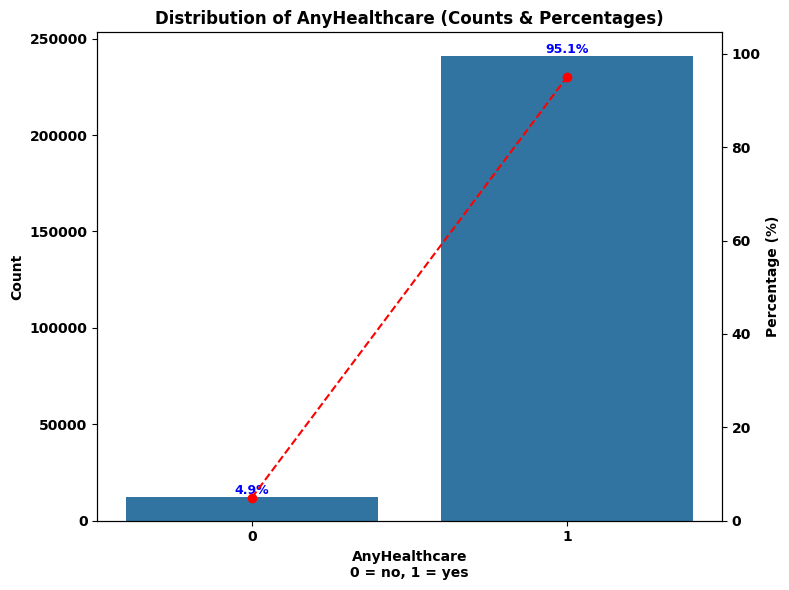

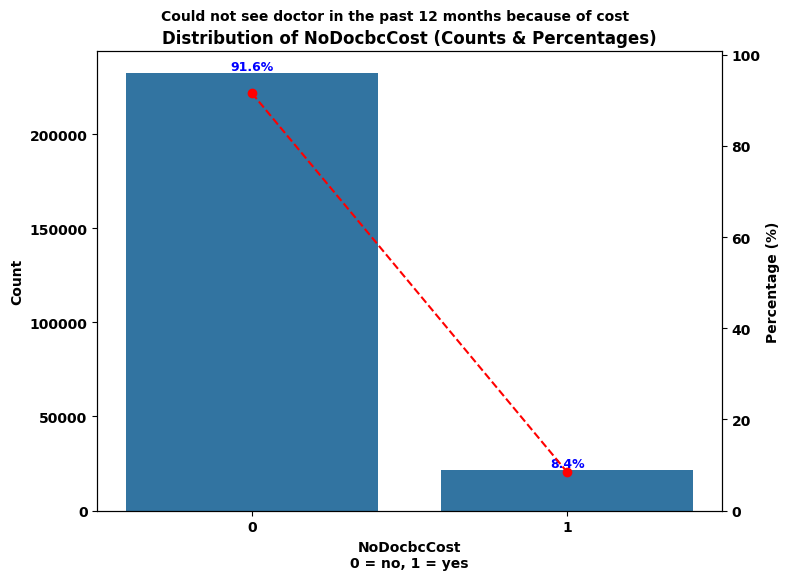

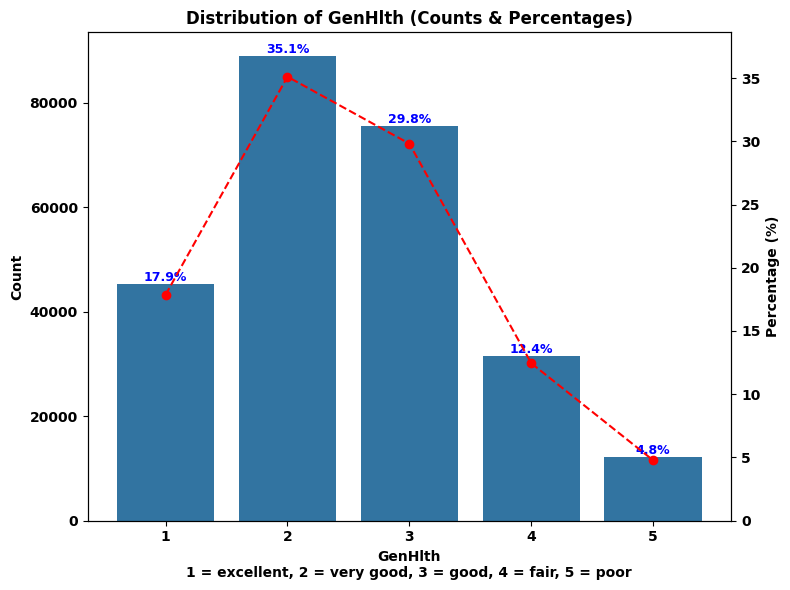

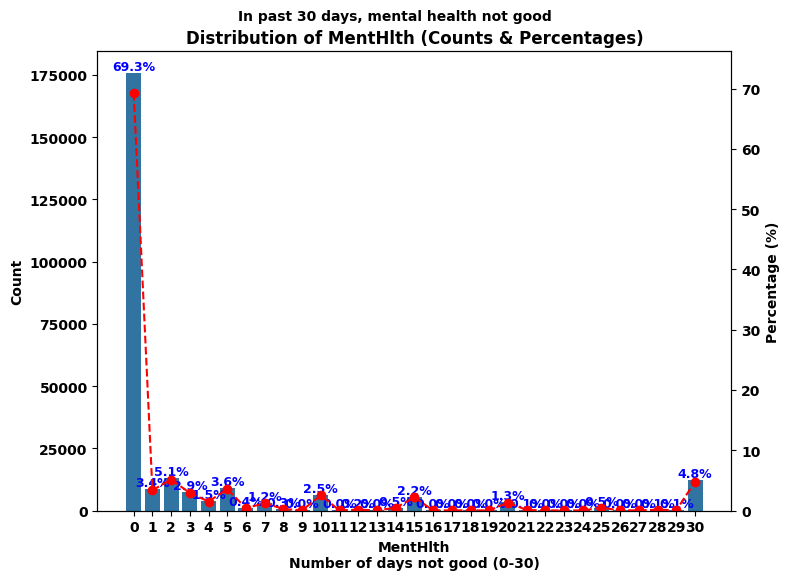

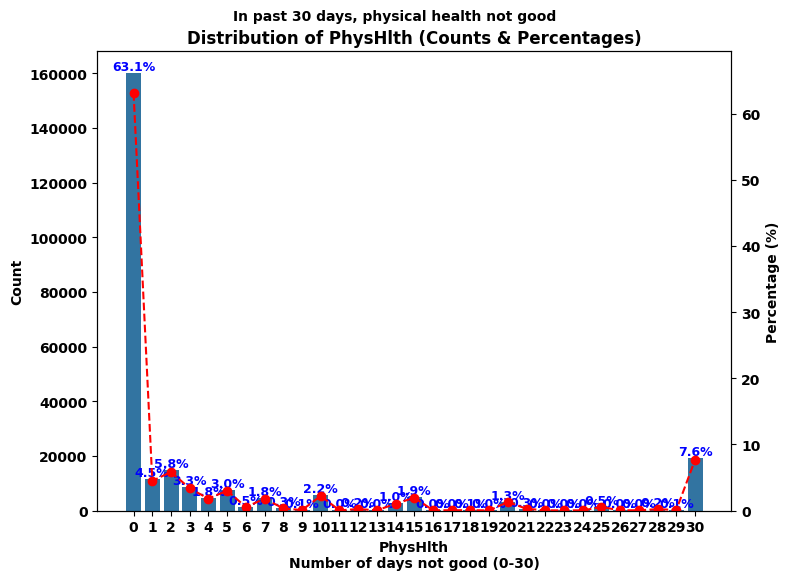

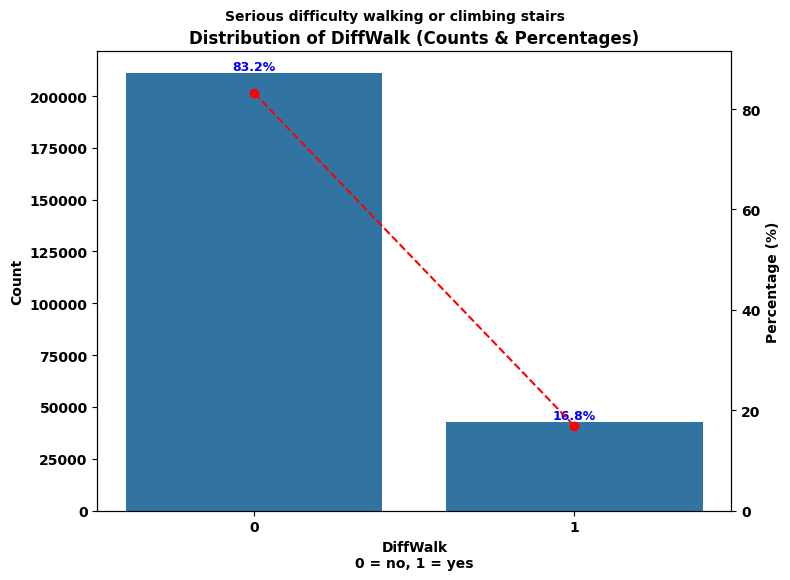

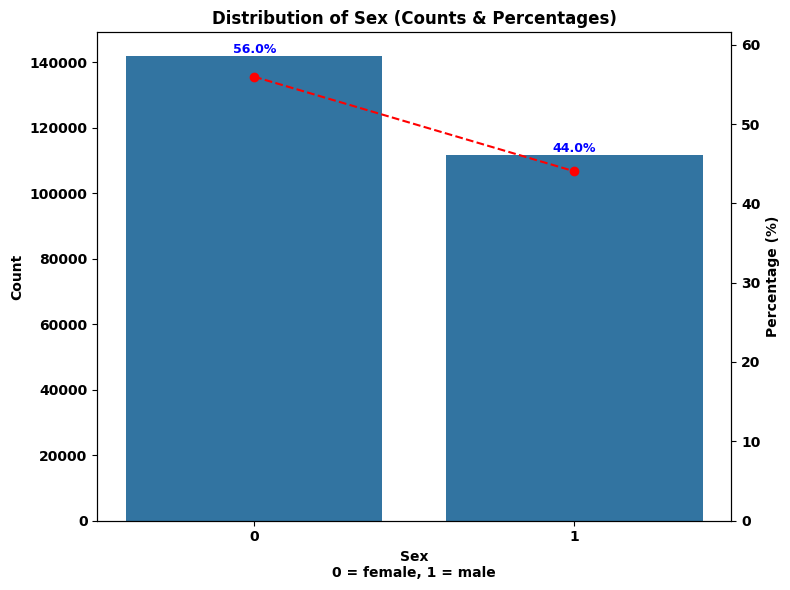

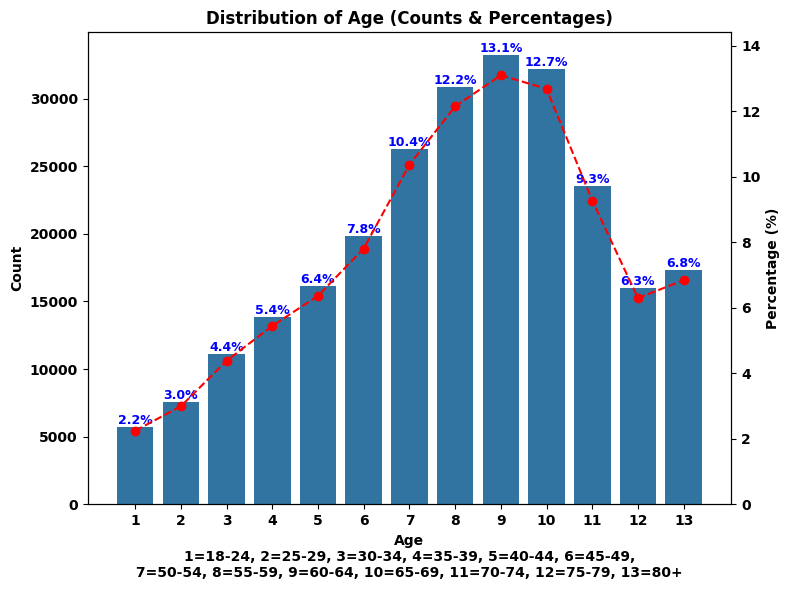

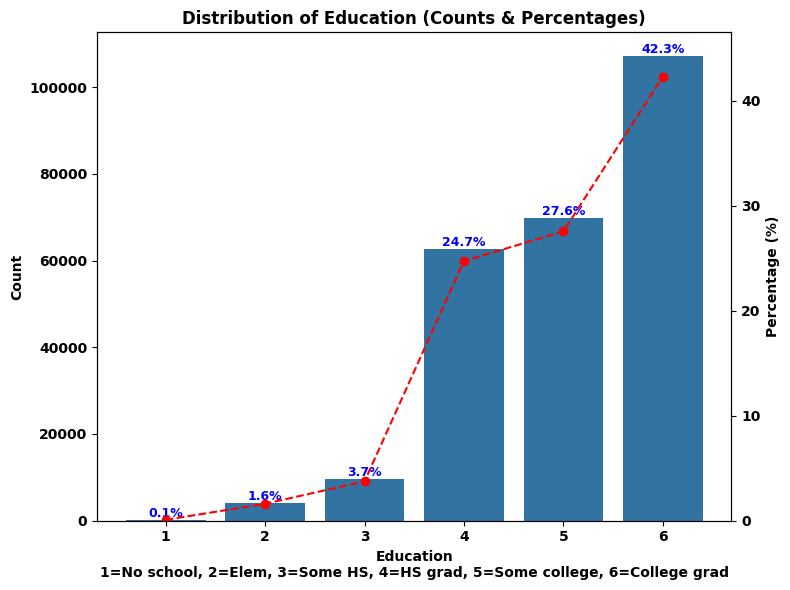

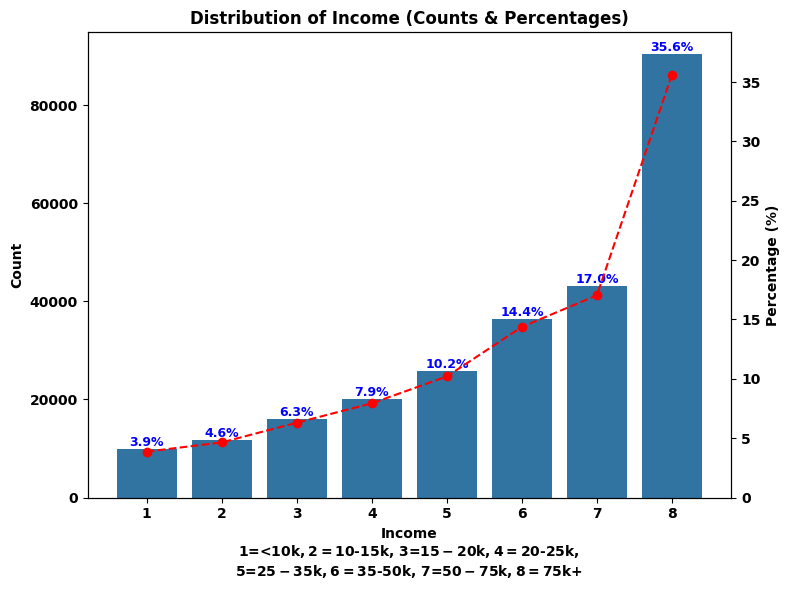

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Set default font family to avoid font warnings
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Add a new column for BMICat based on BMI values
# Define BMI categories based on the CDC guidelines

# Define BMI bins and labels
bmi_bins = [float('-inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = [
    0,  # Underweight
    1,  # Healthy Weight
    2,  # Overweight
    3,  # Class 1 Obesity
    4,  # Class 2 Obesity
    5   # Class 3 Obesity
]

# Create BMICat column
df['BMICat'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=True).astype(int)


# List of columns to visualize in the specified order
columns_to_visualize = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 
                        'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                        'PhysActivity', 'Fruits', 'Veggies', 
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                        'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
                        'Age', 'Education', 'Income']

# Add BMICat to columns_to_visualize
columns_to_visualize = ['BMICat'] + columns_to_visualize

# Create and save a plot for each column

# Dictionary mapping variable names to x-axis explanations
x_axis_explanations = {
    "Diabetes_binary": "0 = no diabetes, 1 = prediabetes or diabetes",
    "HighBP": "0 = no high BP, 1 = high BP",
    "HighChol": "0 = no high cholesterol, 1 = high cholesterol",
    "CholCheck": "0 = no cholesterol check in 5 years, 1 = yes",
    "Smoker": "0 = no, 1 = yes",
    "Stroke": "0 = no, 1 = yes",
    "HeartDiseaseorAttack": "0 = no, 1 = yes",
    "PhysActivity": "0 = no, 1 = yes",
    "Fruits": "0 = no, 1 = yes",
    "Veggies": "0 = no, 1 = yes",
    "HvyAlcoholConsump": "0 = no, 1 = yes",
    "AnyHealthcare": "0 = no, 1 = yes",
    "NoDocbcCost": "0 = no, 1 = yes",
    "GenHlth": "1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor",
    "MentHlth": "Number of days not good (0-30)",
    "PhysHlth": "Number of days not good (0-30)",
    "DiffWalk": "0 = no, 1 = yes",
    "Sex": "0 = female, 1 = male",
    "Age": "1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49,\n7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80+",
    "Education": "1=No school, 2=Elem, 3=Some HS, 4=HS grad, 5=Some college, 6=College grad",
    "Income": "1=<$10k, 2=$10-15k, 3=$15-20k, 4=$20-25k, \n5=$25-35k, 6=$35-50k, 7=$50-75k, 8=$75k+"
}
# Add explanation for BMICat
x_axis_explanations['BMICat'] = (
    "0=Underweight (<18.5), 1=Healthy (18.5-24.9), 2=Overweight (25-29.9), "
    "\n3=Obesity I (30-34.9), 4=Obesity II (35-39.9), 5=Obesity III (>=40)"
)

# Dictionary of subtitles for specific columns
extra_titles = {
    "CholCheck": "Cholesterol check in past 5 years",
    "PhysActivity": "Physical activity in past 30 days (not including job)",
    "HvyAlcoholConsump": "Men >14 drinks/wk, Women >7 drinks/wk",
    "NoDocbcCost": "Could not see doctor in the past 12 months because of cost",
    "MentHlth": "In past 30 days, mental health not good",
    "PhysHlth": "In past 30 days, physical health not good",
    "DiffWalk": "Serious difficulty walking or climbing stairs"
}

for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))

    if column == 'BMI':
        sns.histplot(data=df, x=column, kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    elif column == 'BMICat':
        ax = sns.histplot(data=df, x='BMICat', discrete=True)
        plt.title('Distribution of BMI Categories')
        plt.xlabel('BMI Category (0=Underweight, 1=Healthy, 2=Overweight, \n3=Obesity I, 4=Obesity II, 5=Obesity III)')
        plt.ylabel('Frequency')

        # Calculate counts and percentages
        total = len(df)
        value_counts = df['BMICat'].value_counts().sort_index()
        percentages = (value_counts / total * 100)

        # Annotate bars with percentage values
        for p, perc in zip(ax.patches, percentages):
            height = p.get_height()
            ax.annotate(f'{perc:.1f}%',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='blue', rotation=0)

        ax2 = ax.twinx()
        ax2.set_ylabel('Percentage (%)')
        ax2.set_ylim(0, percentages.max() * 1.1)
                # Use the actual category codes for x-axis
        ax2.plot(value_counts.index, percentages.values, color='red', marker='o', linestyle='--', label='Percentage')

        plt.tight_layout()
        plt.show()
    else:
        ax = sns.countplot(data=df, x=column, order=sorted(df[column].unique()))
        ax.set_ylabel('Count')
        plt.title(f'Distribution of {column} (Counts & Percentages)')
        if column in extra_titles:
            plt.suptitle(extra_titles[column], fontsize=10, y=0.96)
        plt.xlabel(f"{column}\n{x_axis_explanations.get(column, '')}")

        total = len(df)
        value_counts = df[column].value_counts().sort_index()
        percentages = (value_counts / total * 100)

        # Annotate bars with percentage values
        for p, perc in zip(ax.patches, percentages):
            height = p.get_height()
            ax.annotate(f'{perc:.1f}%', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='blue', rotation=0)

        ax2 = ax.twinx()
        ax2.set_ylabel('Percentage (%)')
        ax2.set_ylim(0, percentages.max() * 1.1)
        ax2.plot(ax.get_xticks(), percentages.values, color='red', marker='o', linestyle='--', label='Percentage')
        # ax2.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

In [36]:
# Create a table with counts and percentages for every unique BMI value
bmi_counts = df['BMI'].value_counts().sort_index()
bmi_percentages = (bmi_counts / len(df)) * 100

bmi_table = pd.DataFrame({
    'BMI Value': bmi_counts.index,
    'Count': bmi_counts.values,
    'Percentage': bmi_percentages.values
})

# Display the table with all rows visible
with pd.option_context('display.max_rows', None):
    print(bmi_table)

    BMI Value  Count  Percentage
0          12      6    0.002365
1          13     21    0.008278
2          14     41    0.016162
3          15    132    0.052034
4          16    348    0.137181
5          17    776    0.305897
6          18   1803    0.710738
7          19   3968    1.564175
8          20   6327    2.494087
9          21   9855    3.884816
10         22  13643    5.378035
11         23  15610    6.153422
12         24  19550    7.706559
13         25  17146    6.758909
14         26  20562    8.105487
15         27  24606    9.699622
16         28  16545    6.521996
17         29  14890    5.869599
18         30  14573    5.744639
19         31  12275    4.838773
20         32  10474    4.128824
21         33   8948    3.527278
22         34   7181    2.830732
23         35   5575    2.197651
24         36   4633    1.826317
25         37   4147    1.634737
26         38   3397    1.339089
27         39   2911    1.147509
28         40   2258    0.890098
29        

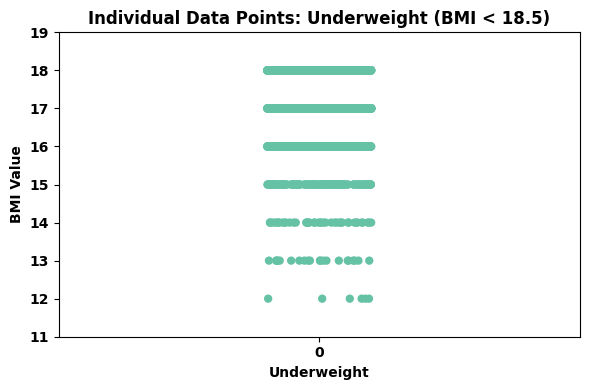

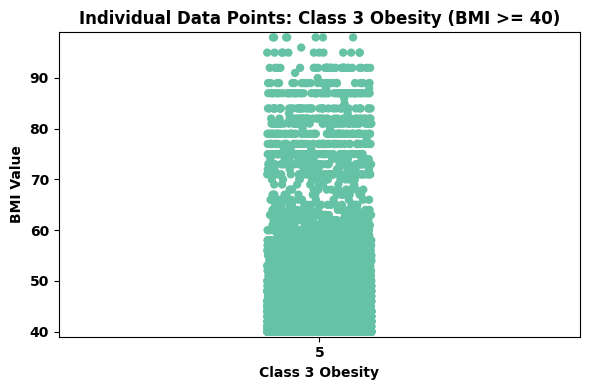

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Underweight (<18.5) and Class 3 Obesity (>=40)
underweight = df[df['BMICat'] == 0]
obesity3 = df[df['BMICat'] == 5]

# Plot Underweight
plt.figure(figsize=(6, 4))
sns.stripplot(data=underweight, x='BMICat', y='BMI', hue='BMICat', legend=False, jitter=True, size=6, palette='Set2')
plt.title('Individual Data Points: Underweight (BMI < 18.5)')
plt.xlabel('Underweight')
plt.ylabel('BMI Value')
plt.ylim(underweight['BMI'].min() - 1, underweight['BMI'].max() + 1)
plt.tight_layout()
plt.show()

# Plot Class 3 Obesity
plt.figure(figsize=(6, 4))
sns.stripplot(data=obesity3, x='BMICat', y='BMI', hue='BMICat', legend=False, jitter=True, size=6, palette='Set2')
plt.title('Individual Data Points: Class 3 Obesity (BMI >= 40)')
plt.xlabel('Class 3 Obesity')
plt.ylabel('BMI Value')
plt.ylim(obesity3['BMI'].min() - 1, obesity3['BMI'].max() + 1)
plt.tight_layout()
plt.show()

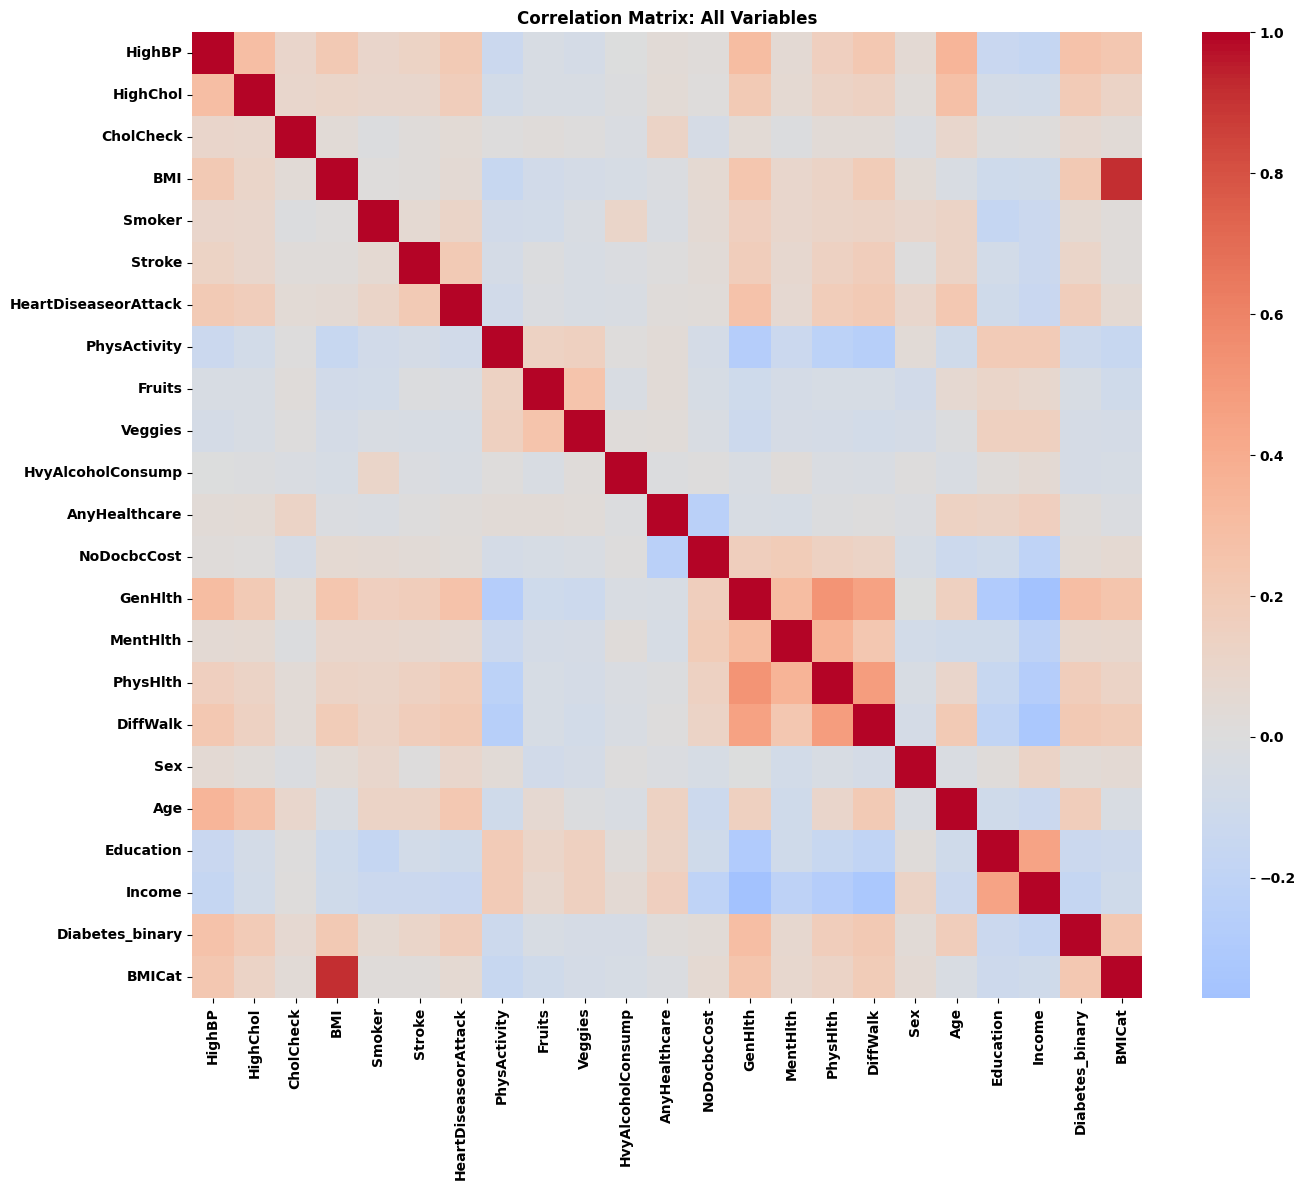

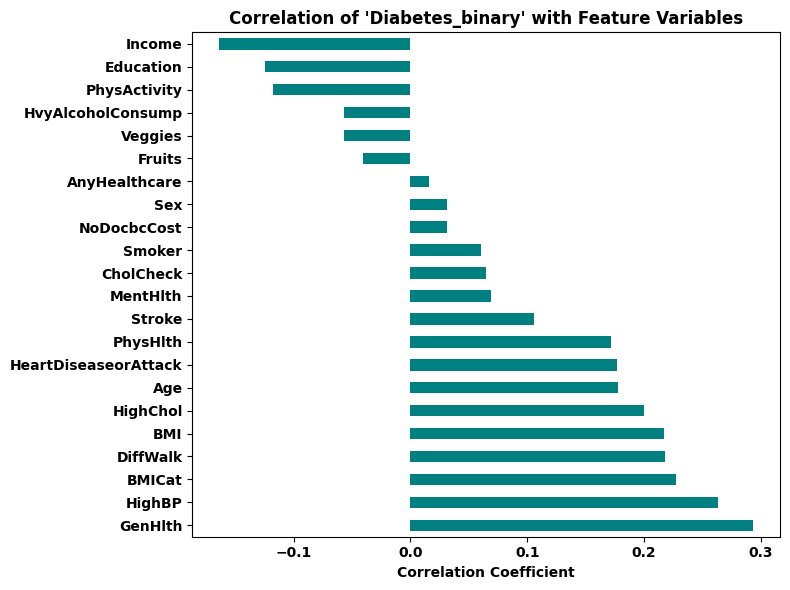

In [38]:
# --- 1. Correlation matrix for all variables ---
plt.figure(figsize=(14, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: All Variables')
plt.tight_layout()
plt.show()

# --- 2. Correlation of target with all features ---
target_corr = corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
plt.figure(figsize=(8, 6))
target_corr.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Correlation of 'Diabetes_binary' with Feature Variables")
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Interpretation:  
A positive correlation means the feature increases as the likelihood of being in the "prediabetes or diabetes" group (1) increases.  
A negative correlation means the feature increases as the likelihood of being in the "no diabetes" group (0) increases.  

In [39]:
# Calculate and display correlations with Diabetes_binary, sorted from biggest to smallest
correlations = df.corr(numeric_only=True)['Diabetes_binary'].drop('Diabetes_binary')
correlation_table = correlations.sort_values(ascending=False).reset_index()
correlation_table.columns = ['Feature', 'Correlation with Diabetes_binary']
print(correlation_table.round(2))

                 Feature  Correlation with Diabetes_binary
0                GenHlth                              0.29
1                 HighBP                              0.26
2                 BMICat                              0.23
3               DiffWalk                              0.22
4                    BMI                              0.22
5               HighChol                              0.20
6                    Age                              0.18
7   HeartDiseaseorAttack                              0.18
8               PhysHlth                              0.17
9                 Stroke                              0.11
10              MentHlth                              0.07
11             CholCheck                              0.06
12                Smoker                              0.06
13           NoDocbcCost                              0.03
14                   Sex                              0.03
15         AnyHealthcare                              0.

In [40]:
# Calculate and display all pairwise correlations between variables (excluding Diabetes_binary)
corr_matrix = df.drop(columns=['Diabetes_binary']).corr(numeric_only=True)

# Unstack the matrix, reset index, and filter out self-correlations and duplicates
corr_pairs = (
    corr_matrix
    .abs()  # Use absolute value if you want to sort by strength regardless of sign
    .unstack()
    .reset_index()
)
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['Pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='Pair').drop(columns='Pair')

# Sort by absolute correlation, descending
corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Display the table with all rows visible
with pd.option_context('display.max_rows', None):
    print(corr_pairs.round(2))

               Variable 1            Variable 2  Correlation
0                     BMI                BMICat         0.92
1                 GenHlth              PhysHlth         0.52
2                PhysHlth              DiffWalk         0.48
3                 GenHlth              DiffWalk         0.46
4               Education                Income         0.45
5                 GenHlth                Income         0.37
6                MentHlth              PhysHlth         0.35
7                  HighBP                   Age         0.34
8                DiffWalk                Income         0.32
9                 GenHlth              MentHlth         0.30
10                 HighBP               GenHlth         0.30
11                 HighBP              HighChol         0.30
12                GenHlth             Education         0.28
13               HighChol                   Age         0.27
14               PhysHlth                Income         0.27
15           PhysActivit

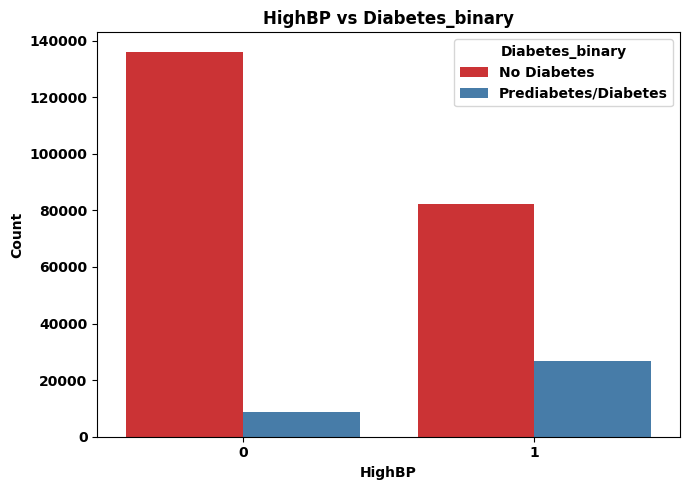

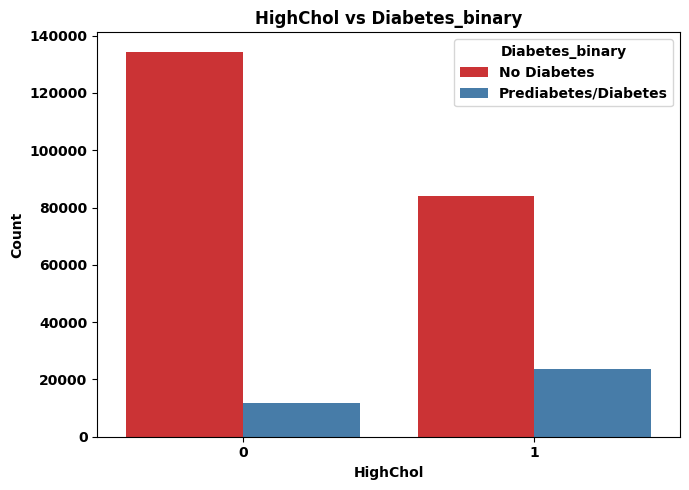

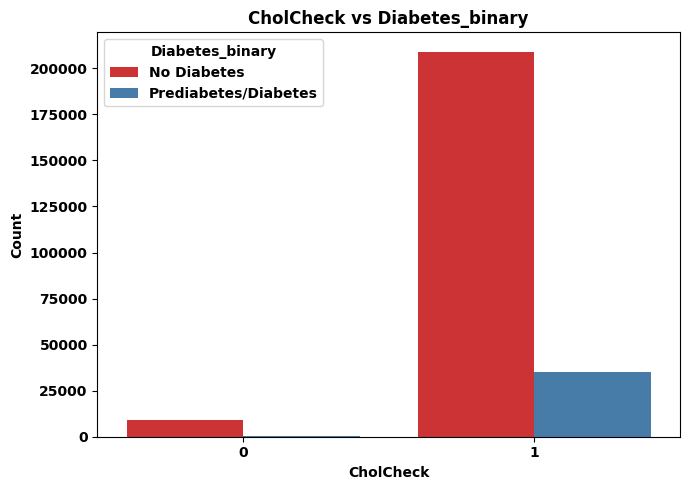

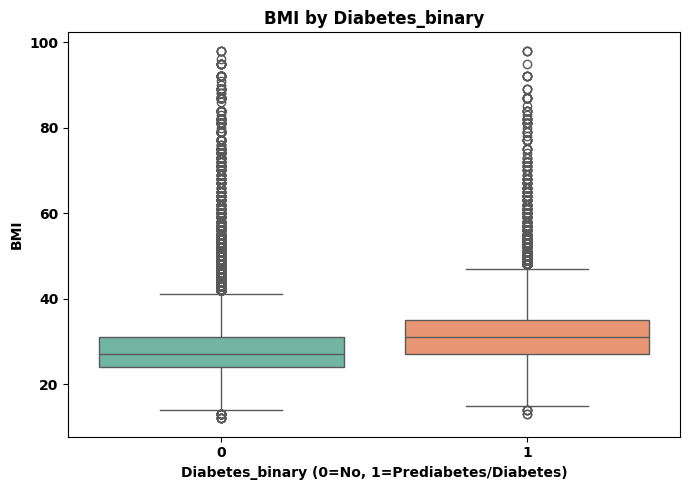

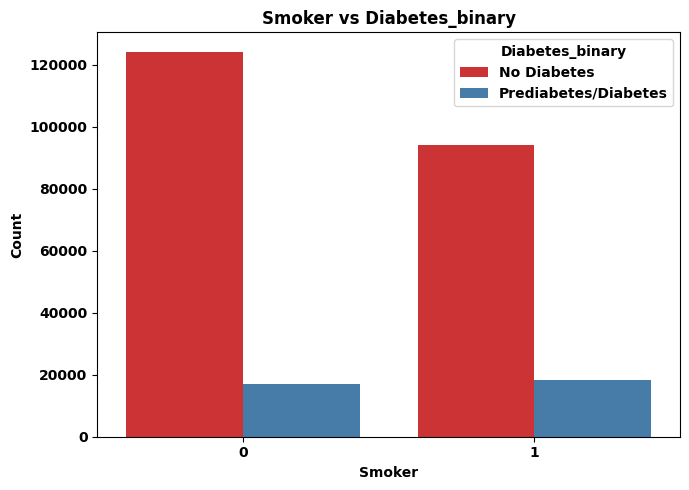

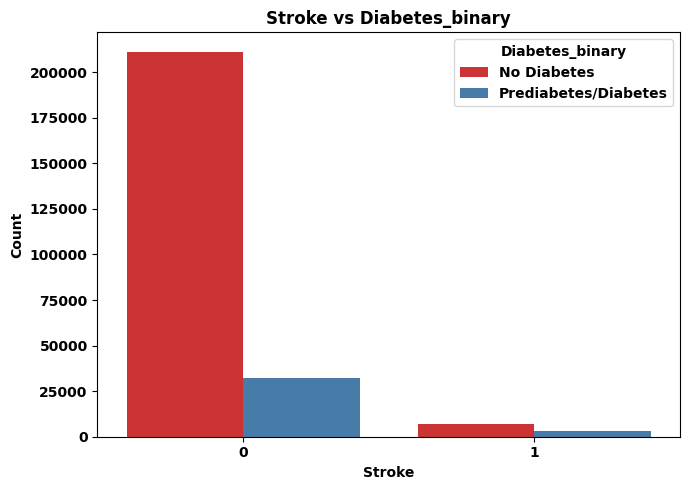

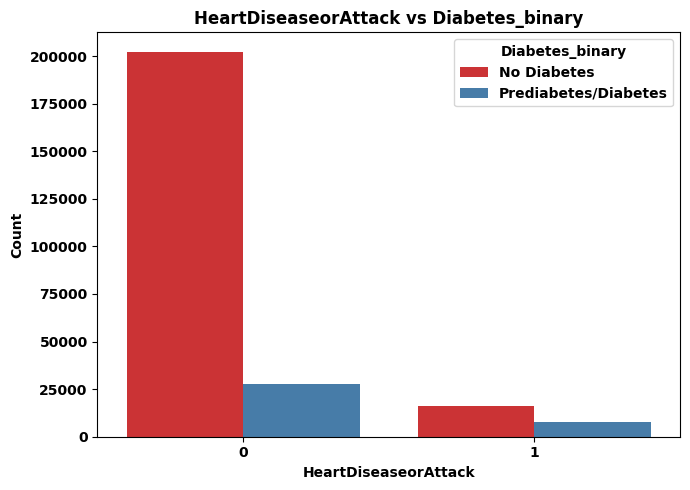

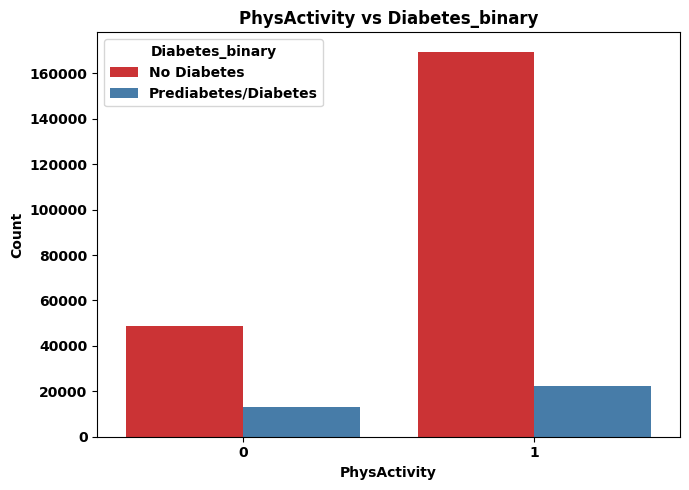

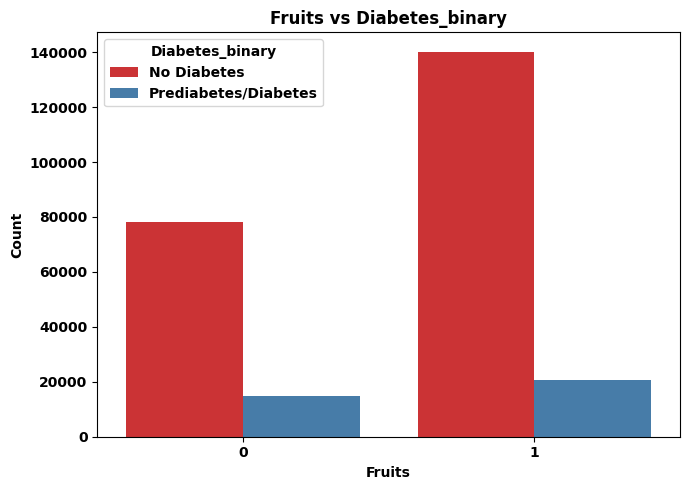

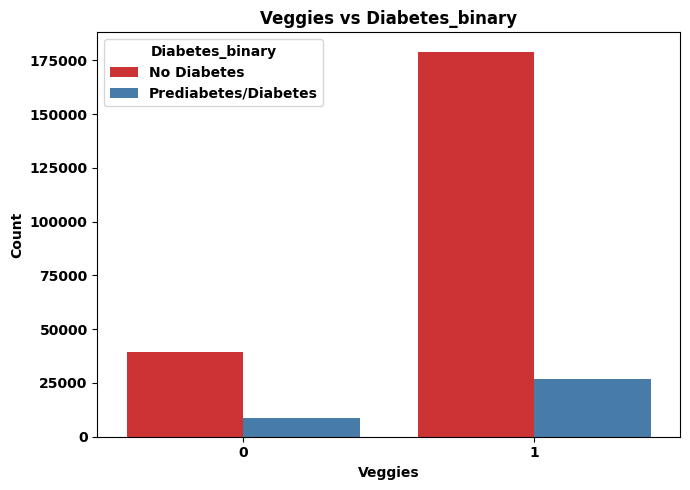

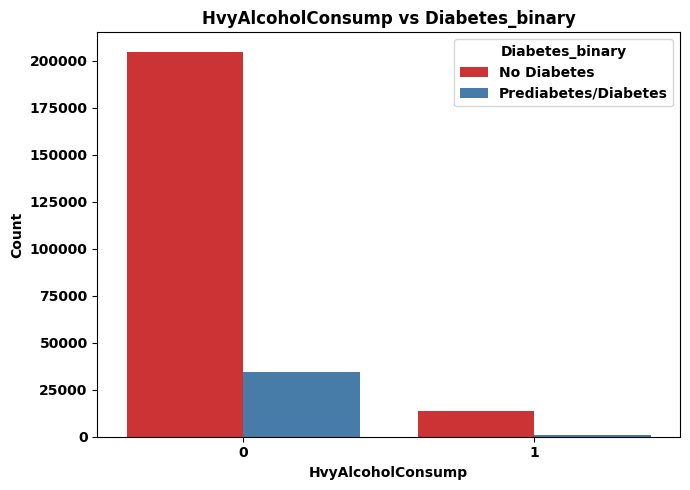

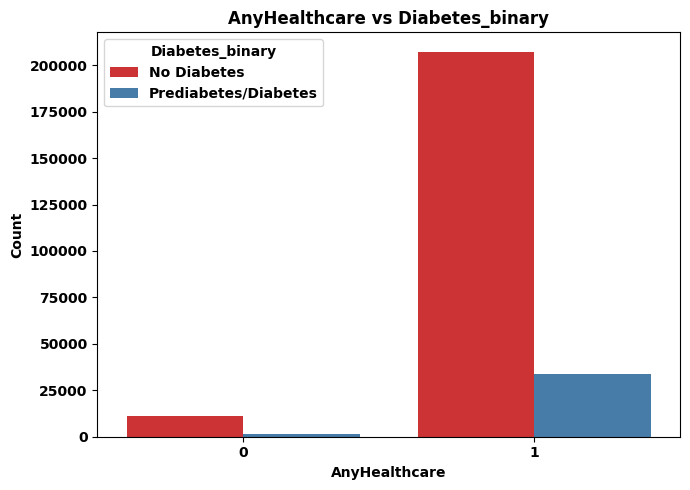

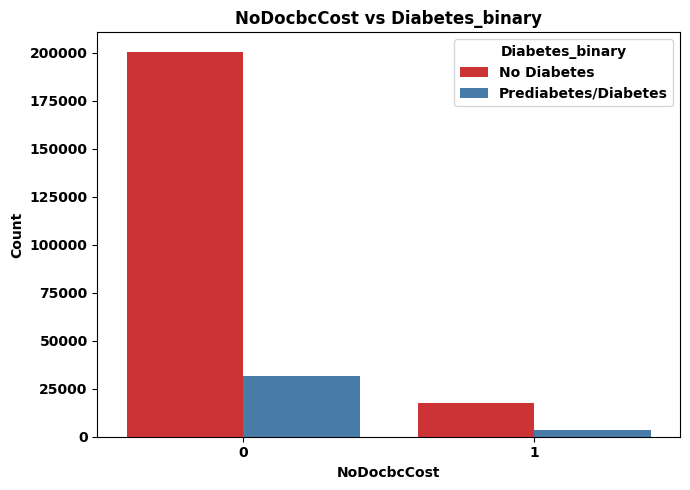

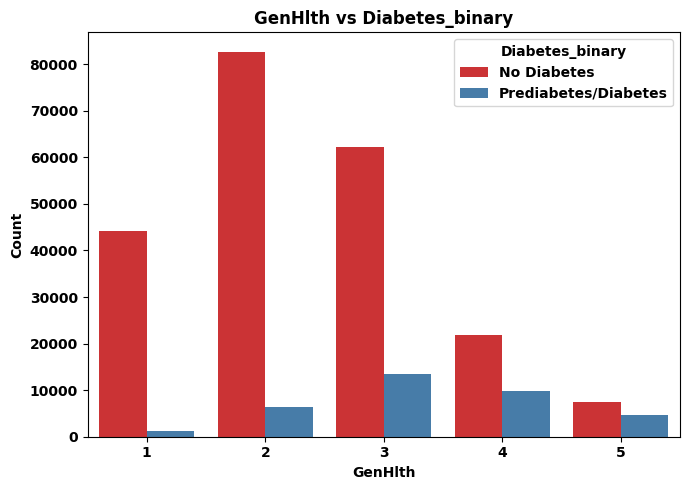

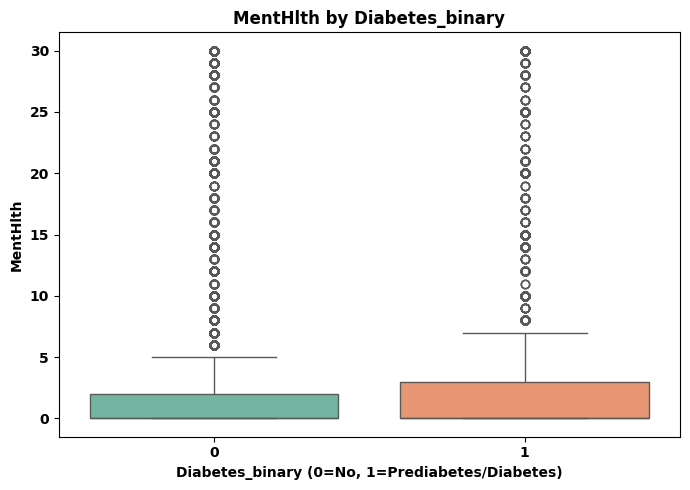

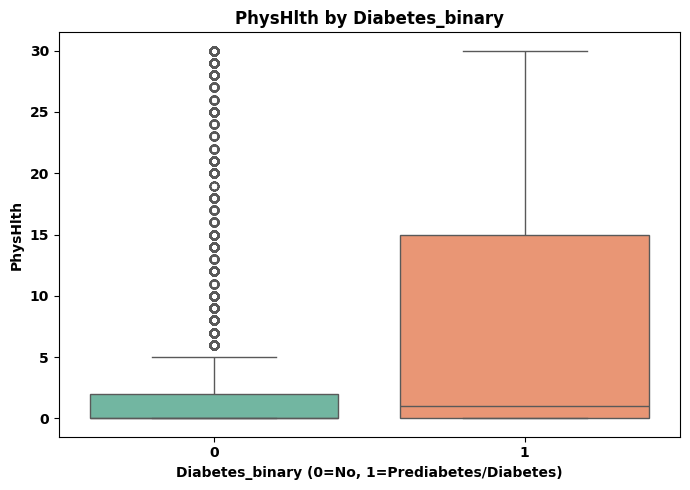

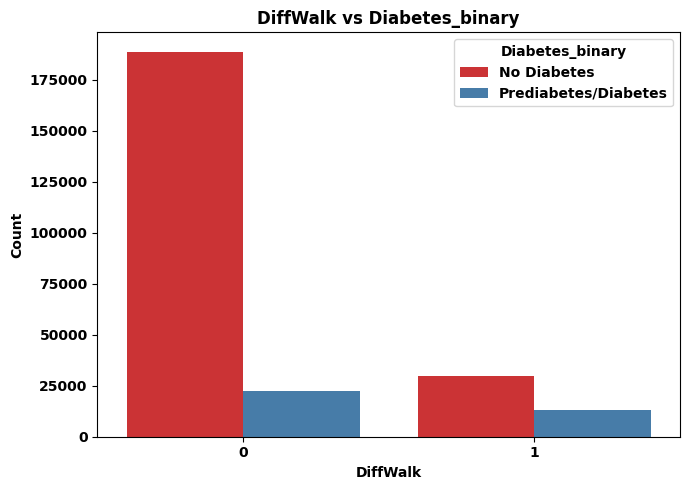

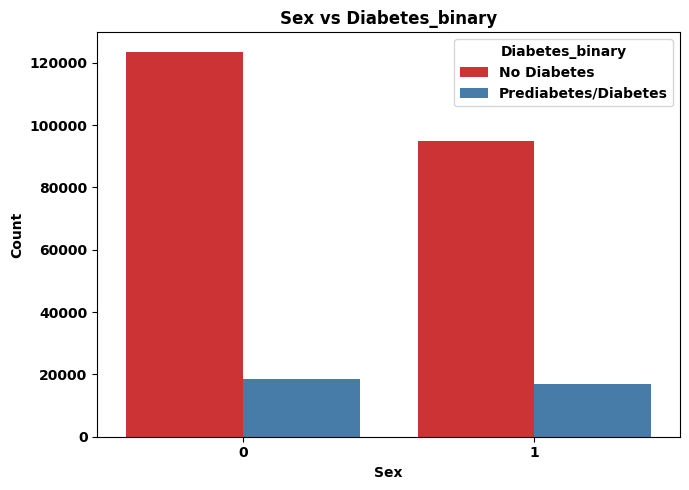

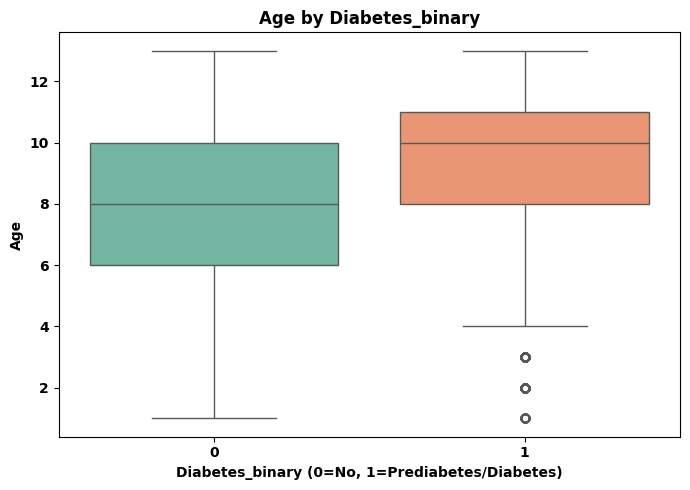

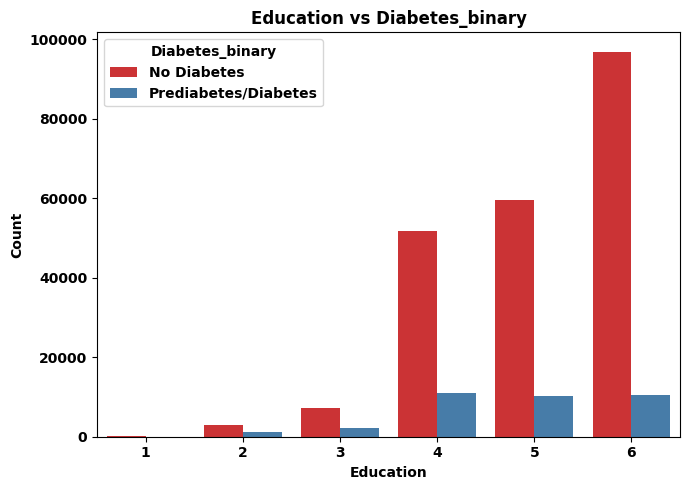

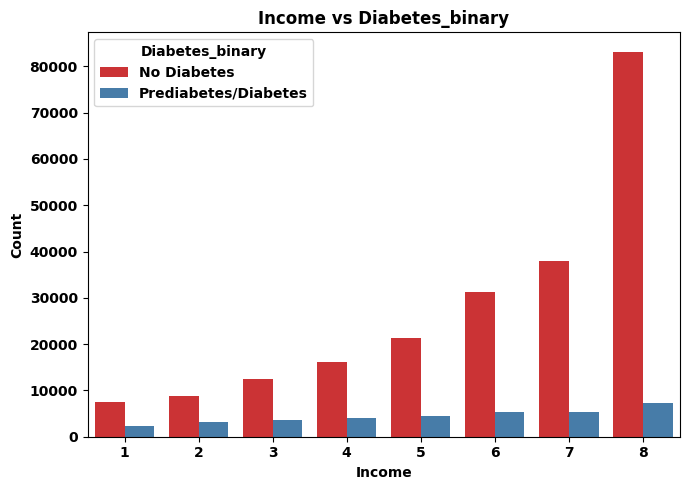

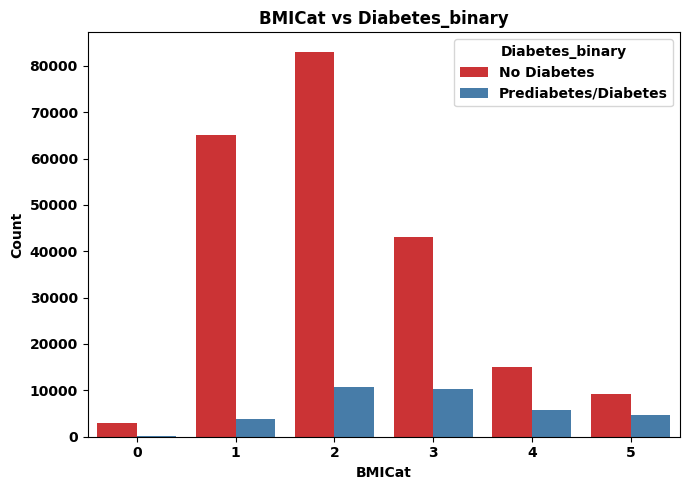

In [41]:
# Visualize feature-to-target patterns for all features
all_features = [col for col in df.columns if col != 'Diabetes_binary']

for feature in all_features:
    plt.figure(figsize=(7, 5))
    if df[feature].nunique() <= 10 and df[feature].dtype in [int, 'int64', 'int32']:
        # Categorical or ordinal: use countplot with hue
        sns.countplot(data=df, x=feature, hue='Diabetes_binary', palette='Set1')
        plt.title(f'{feature} vs Diabetes_binary')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Diabetes_binary', labels=['No Diabetes', 'Prediabetes/Diabetes'])
    else:
        # Continuous: use boxplot, assign hue to avoid FutureWarning
        sns.boxplot(data=df, x='Diabetes_binary', y=feature, hue='Diabetes_binary', palette='Set2', legend=False)
        plt.title(f'{feature} by Diabetes_binary')
        plt.xlabel('Diabetes_binary (0=No, 1=Prediabetes/Diabetes)')
        plt.ylabel(feature)
        plt.legend([],[], frameon=False)  # Hide redundant legend
    plt.tight_layout()
    plt.show()

To analyze the correlation between Diabetes_binary (0 or 1) and each BMI category (BMICat), the code computes the mean diabetes rate for each BMI category and display it as a bar plot.
The actual correlation coefficients (e.g., Pearson), are computed for each category.
The first part shows the average diabetes rate for each BMI category.
The second part shows the correlation coefficient between Diabetes_binary and each BMI category (one-hot encoded).

Mean Diabetes Rate by BMI Category:
BMICat
0    0.054045
1    0.056966
2    0.114049
3    0.192344
4    0.274355
5    0.335372
Name: Diabetes_binary, dtype: float64


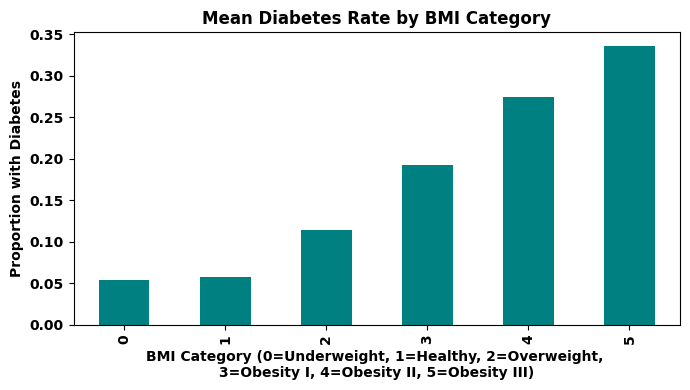


Pearson correlation between Diabetes_binary and each BMICat dummy variable:
BMICat_0: -0.028
BMICat_1: -0.145
BMICat_2: -0.056
BMICat_3: 0.079
BMICat_4: 0.116
BMICat_5: 0.135


In [43]:
# 1. Mean diabetes rate for each BMI category
bmi_diabetes_rate = df.groupby('BMICat')['Diabetes_binary'].mean()
print("Mean Diabetes Rate by BMI Category:")
print(bmi_diabetes_rate)

# Optional: Bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
bmi_diabetes_rate.plot(kind='bar', color='teal')
plt.title('Mean Diabetes Rate by BMI Category')
plt.xlabel('BMI Category (0=Underweight, 1=Healthy, 2=Overweight, \n3=Obesity I, 4=Obesity II, 5=Obesity III)')
plt.ylabel('Proportion with Diabetes')
plt.tight_layout()
plt.show()

# 2. Pearson correlation between Diabetes_binary and each BMICat dummy variable
bmi_dummies = pd.get_dummies(df['BMICat'], prefix='BMICat')
correlations = {}
for col in bmi_dummies.columns:
    corr = df['Diabetes_binary'].corr(bmi_dummies[col])
    correlations[col] = corr
print("\nPearson correlation between Diabetes_binary and each BMICat dummy variable:")
for cat, corr in correlations.items():
    print(f"{cat}: {corr:.3f}")

## Top 5 Insights from Exploratory Data Analysis

1. **Class Imbalance in Diabetes Status:**  
   The dataset shows a significant imbalance between healthy individuals and those with (pre)diabetes. The majority of records are classified as non-diabetic, which may impact model training and evaluation.

2. **Strongest Correlations with Diabetes:**  
   Features such as HighBP (high blood pressure), HighChol (high cholesterol), and BMI have the highest positive correlations with the Diabetes_binary target. This suggests that individuals with higher blood pressure, cholesterol, and BMI are more likely to have (pre)diabetes.

3. **BMI Distribution and Outliers:**  
   The BMI values in the dataset range widely, with a small number of extreme outliers (very high or low BMI). Most individuals fall within the healthy or overweight categories, but there are notable groups in underweight and severe obesity classes.

4. **Feature-to-Target Patterns:**  
   Visualizations show clear differences in the distributions of features like Age, GenHlth, and PhysHlth between diabetic and non-diabetic groups. For example, older age groups and those reporting poorer general or physical health are more likely to be diabetic.

5. **Binary Health Behaviors:**  
   Health behavior features such as PhysActivity, Fruits, and Veggies show that individuals with healthier behaviors (more physical activity, higher fruit/vegetable intake) are less likely to be diabetic, as seen in the countplots.

# GlucoTrack – Beginner Track  
## ✅ Week 1: Exploratory Data Analysis (EDA)

### 📦 1. Data Integrity & Structure

**Q: Are there any missing, duplicate, or incorrectly formatted entries in the dataset?**  
A:  
- There are no missing values in the dataset (all columns show 0 missing).
- Duplicate rows exist with the feature profile or pattern, but these are not duplicates but individuals with the same questionnaire answers.
- Columns were checked for invalid values (e.g., binary columns, GenHlth, Age, Education, Income), and no incorrectly formatted entries were found based on the provided value ranges.

**Q: Are all data types appropriate (e.g., numeric, categorical)?**  
A:  
- Data types are appropriate for each column. Numeric columns are stored as integers or floats, and categorical variables are encoded as integers.

**Q: Did you detect any constant, near-constant, or irrelevant features?**  
A:  
- No constant or near-constant features were detected in the outputs. All features show variation.

---

### 🎯 2. Target Variable Assessment

**Q: What is the distribution of Diabetes_binary?**  
A:  
- The target variable `Diabetes_binary` is imbalanced, with the majority of records classified as non-diabetic (0) and a smaller proportion as (pre)diabetic (1).

**Q: Is there a class imbalance? If so, how significant is it?**  
A:  
- Yes, there is a significant class imbalance. The ratio of healthy to diabetic patients is much greater than 1, indicating far more healthy individuals.

**Q: How might this imbalance influence your choice of evaluation metrics or model strategy?**  
A:  
- The imbalance suggests that accuracy alone may be misleading. Evaluation metrics such as ROC-AUC, F1-score, precision, and recall should be considered. Techniques like class weighting, resampling, or using specialized algorithms may be needed.

---

### 📊 3. Feature Distribution & Quality

**Q: Which numerical features are skewed or contain outliers?**  
A:  
- BMI is notably skewed and contains outliers, especially at the high and low ends. Other features like Age, MentHlth, and PhysHlth may also show skewness.

**Q: Did any features contain unrealistic or problematic values?**  
A:  
- No unrealistic or problematic values were found based on the value range checks for binary and ordinal features.

**Q: What transformation methods (if any) might improve these feature distributions?**  
A:  
- Log or Box-Cox transformations could help normalize skewed features like BMI. Outlier handling (e.g., winsorization or clipping) may also be beneficial.

---

### 📈 4. Feature Relationships & Patterns

**Q: Which categorical features (e.g., GenHealth, PhysicalActivity, Smoking) show visible patterns in relation to Diabetes_binary?**  
A:  
- Features such as GenHlth, PhysActivity, Fruits, Veggies, and Smoking show visible patterns. For example, poorer general health and less physical activity are associated with higher diabetes prevalence.

**Q: Are there any strong pairwise relationships or multicollinearity between features?**  
A:  
- The correlation matrix shows some strong relationships, particularly between HighBP, HighChol, and BMI with the target. No severe multicollinearity was highlighted, but further analysis may be needed.

**Q: What trends or correlations stood out during your analysis?**  
A:  
- HighBP, HighChol, and BMI have the strongest positive correlations with Diabetes_binary. Healthier behaviors and better self-reported health are associated with lower diabetes risk.

---

### 🧰 5. EDA Summary & Preprocessing Plan

**Q: What are your 3–5 biggest takeaways from EDA?**  
A:  
1. The dataset is highly imbalanced toward non-diabetic individuals.
2. HighBP, HighChol, and BMI are the strongest predictors of diabetes.
3. BMI distribution is skewed with outliers.
4. Health behaviors and self-reported health status are important predictors.
5. No major data quality issues were found.

**Q: Which features will you scale, encode, or exclude in preprocessing?**  
A:  
- Scale: Continuous features like BMI, Age, MentHlth, PhysHlth.
- Encode: Categorical features such as Education, Income, GenHlth.
- Exclude: No features are currently marked for exclusion, but further feature selection may be performed. The highest correlations between variables are moderate (0.4–0.5), they are not high enough to require automatic exclusion.

**Q: What does your cleaned dataset look like (rows, columns, shape)?**  
A:  
- The cleaned dataset contains the same number of rows as the original and all relevant columns. The exact shape can be checked with `df.shape` after preprocessing.